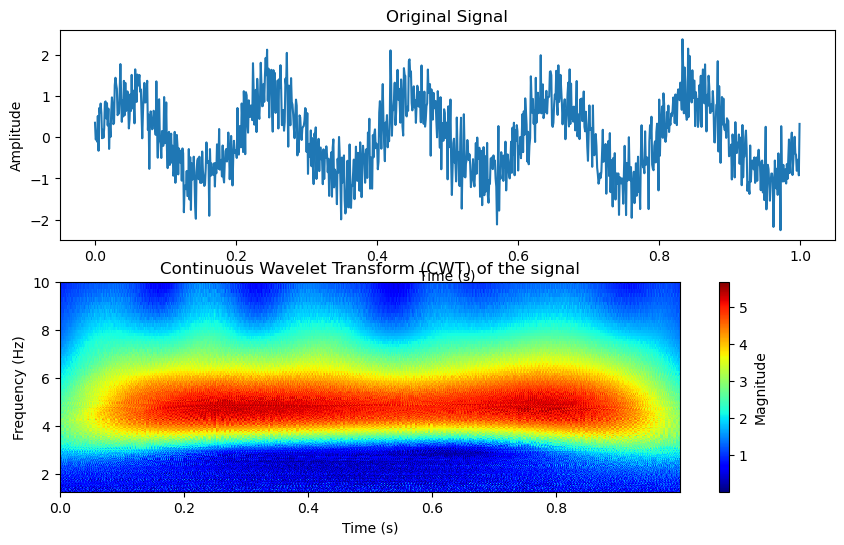

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Signal parameters
fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)
freq = 5  # Frequency of the sine wave in Hz
signal = np.sin(2 * np.pi * freq * t) + np.random.normal(0, 0.5, t.size)

# Wavelet parameters
wavelet = 'cmor2.0-0.5'
scales = np.arange(1, 400)  # Adjust the scale range based on your frequency range of interest

# Map scales to frequencies using the chosen wavelet
frequencies = pywt.scale2frequency(wavelet, scales) * fs

# Perform the CWT
coefficients, _ = pywt.cwt(signal, scales, wavelet, 1 / fs)

# Plot the original signal
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot the CWT result
plt.subplot(2, 1, 2)
plt.pcolormesh(t, frequencies, np.abs(coefficients), shading='auto', cmap='jet')
plt.title('Continuous Wavelet Transform (CWT) of the signal')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Magnitude')
plt.ylim(frequencies[-1], 2*freq)  # Limit the frequency axis to twice the signal frequency for better visibility
plt.show()